# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style="whitegrid")

# Load Data

In [2]:
df = pd.read_csv("most_used_beauty_cosmetics_products.csv")

# Data Cleaning

In [4]:
# Check missing values
print(df.isnull().sum())

# Check for duplicates
df.drop_duplicates(inplace=True)

# Clean Product_Size (remove 'ml' and convert to float)
df['Product_Size_ml'] = df['Product_Size'].str.replace("ml", "").astype(float)


Product_Name         0
Brand                0
Category             0
Usage_Frequency      0
Price_USD            0
Rating               0
Number_of_Reviews    0
Product_Size         0
Skin_Type            0
Gender_Target        0
Packaging_Type       0
Main_Ingredient      0
Cruelty_Free         0
Country_of_Origin    0
Product_Size_ml      0
dtype: int64


# Discreptive Statistics

In [5]:
df.describe()

,Price_USD,Rating,Number_of_Reviews,Product_Size_ml
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,80.134108,3.002327,5014.231333,129.233333
std,40.402983,1.168029,2855.665464,78.544405
min,10.000000,1.000000,52.000000,30.000000
25%,45.480000,2.000000,2562.000000,50.000000
50%,80.040000,3.000000,5002.000000,100.000000
75%,114.760000,4.000000,7497.000000,200.000000
max,149.990000,5.000000,10000.000000,250.000000


# Top 10 Most Frequent Brands

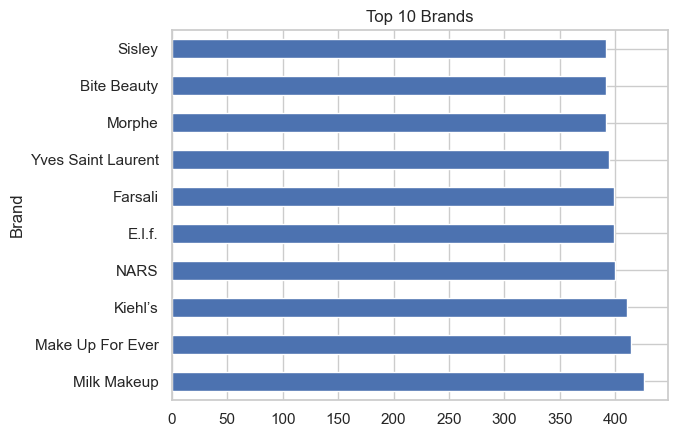

In [7]:
df['Brand'].value_counts().head(10).plot(kind='barh', title='Top 10 Brands')
plt.show()

# Average Rating Per Category

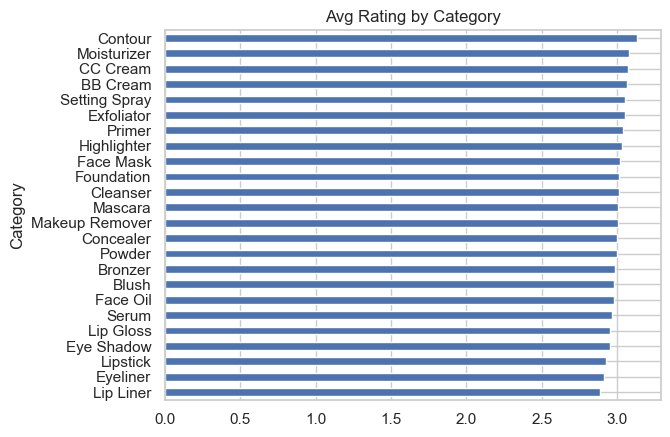

In [8]:
df.groupby('Category')['Rating'].mean().sort_values().plot(kind='barh', title='Avg Rating by Category')
plt.show()

# Number of Review Distribution 

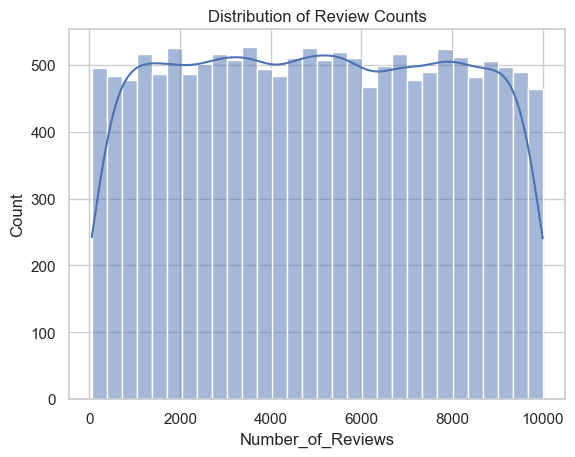

In [9]:
sns.histplot(df['Number_of_Reviews'], bins=30, kde=True)
plt.title('Distribution of Review Counts')
plt.show()

# Cruelty-Free Product Share

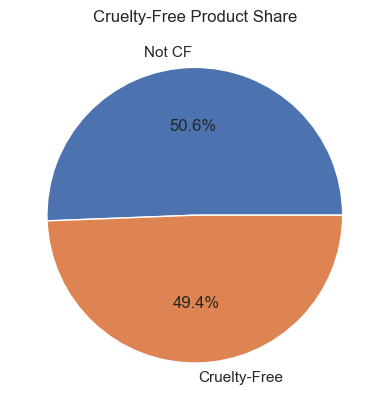

In [10]:
df['Cruelty_Free'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not CF', 'Cruelty-Free'], title='Cruelty-Free Product Share')
plt.ylabel('')
plt.show()

# Price vs. Rating Correlation

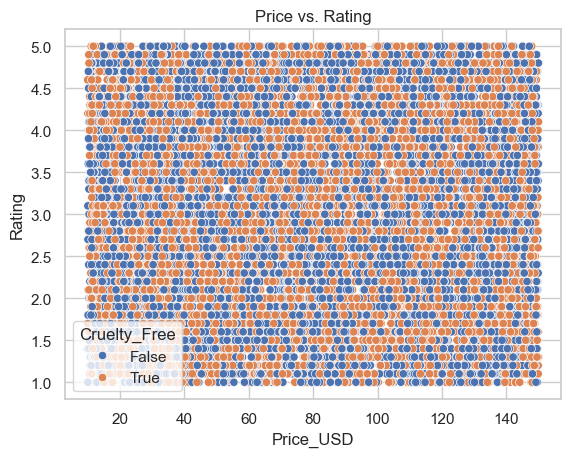

In [11]:
sns.scatterplot(data=df, x='Price_USD', y='Rating', hue='Cruelty_Free')
plt.title('Price vs. Rating')
plt.show()

# Skin Type Distribution

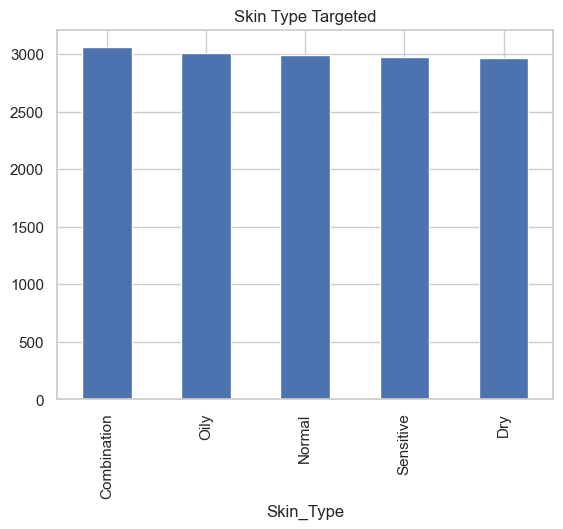

In [12]:
df['Skin_Type'].value_counts().plot(kind='bar', title='Skin Type Targeted')
plt.show()

# Gender Target Analysis

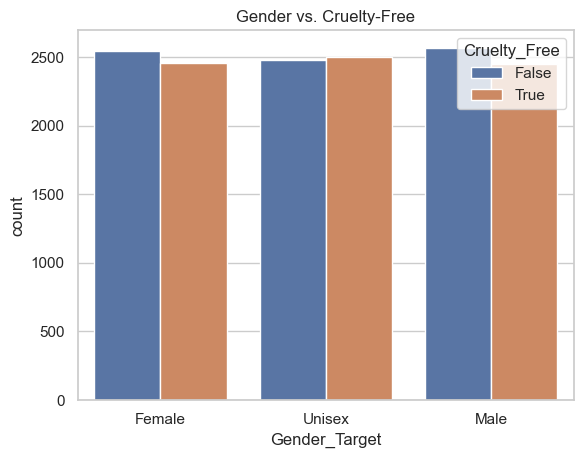

In [13]:
sns.countplot(data=df, x='Gender_Target', hue='Cruelty_Free')
plt.title('Gender vs. Cruelty-Free')
plt.show()

# Most Common Ingredient

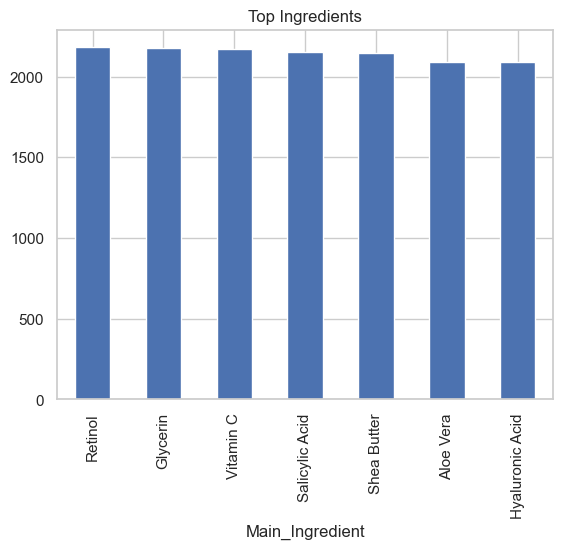

In [14]:
df['Main_Ingredient'].value_counts().head(10).plot(kind='bar', title='Top Ingredients')
plt.show()

# Price By Packaging Type

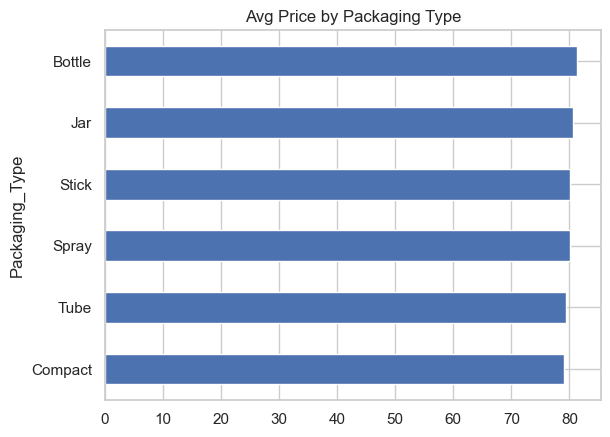

In [15]:
df.groupby('Packaging_Type')['Price_USD'].mean().sort_values().plot(kind='barh', title='Avg Price by Packaging Type')
plt.show()

# Most Popular Contries of Origin

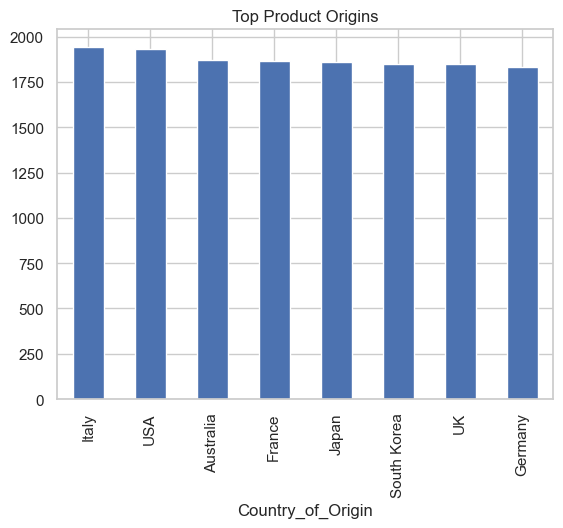

In [16]:
df['Country_of_Origin'].value_counts().head(10).plot(kind='bar', title='Top Product Origins')
plt.show()

# Usage Frequency Trend

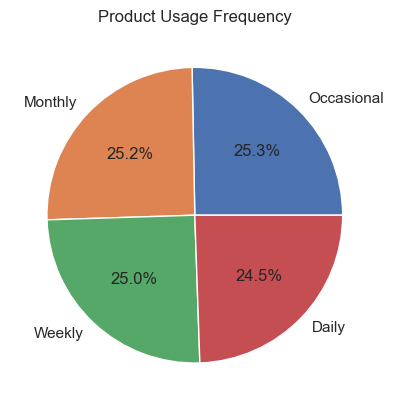

In [18]:
df['Usage_Frequency'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Product Usage Frequency')
plt.ylabel('')
plt.show()

# Category Vs Number of Reviews

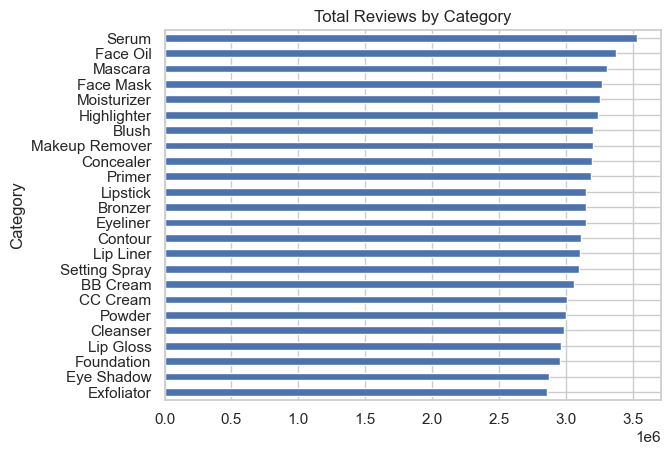

In [19]:
df.groupby('Category')['Number_of_Reviews'].sum().sort_values().plot(kind='barh', title='Total Reviews by Category')
plt.show()


# Top 10 Highest Rated Product 

In [20]:
df[['Product_Name', 'Rating']].sort_values(by='Rating', ascending=False).head(10)

,Product_Name,Rating
14263,Ultra Setting Spray,5.0
2134,Divine Makeup Remover,5.0
11826,Perfect Eyeliner,5.0
12914,Ultra Lip Liner,5.0
9784,Super Lipstick,5.0
9984,Magic Face Oil,5.0
9774,Super CC Cream,5.0
13511,Perfect Makeup Remover,5.0
14812,Ultra Eye Shadow,5.0
9540,Perfect Serum,5.0


# High-End vs Budget Products

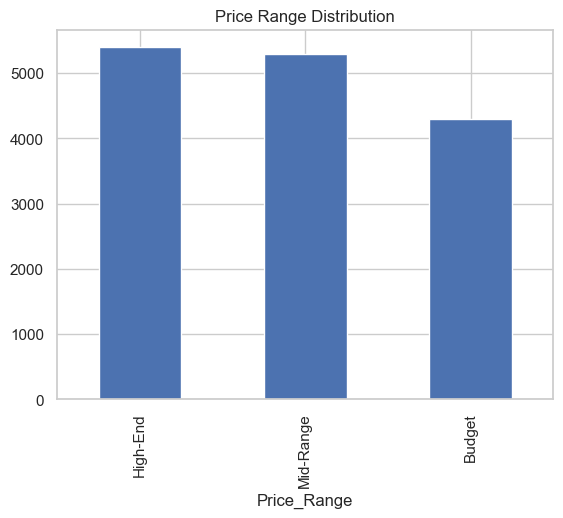

In [21]:
df['Price_Range'] = pd.cut(df['Price_USD'], bins=[0, 50, 100, 500], labels=['Budget', 'Mid-Range', 'High-End'])
df['Price_Range'].value_counts().plot(kind='bar', title='Price Range Distribution')
plt.show()

# Size Vs Price

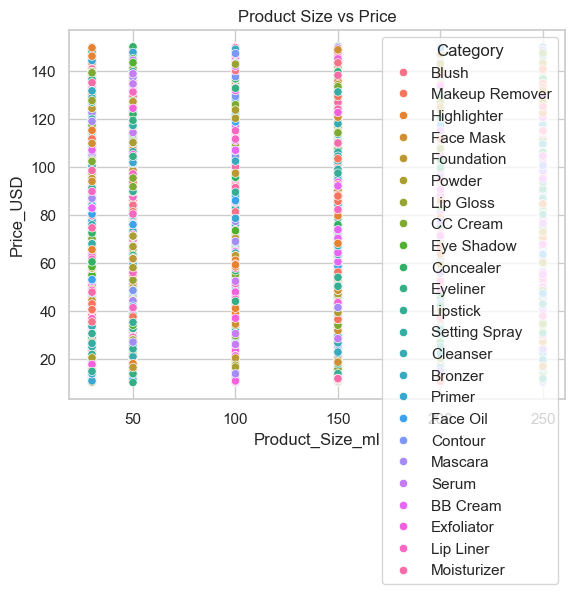

In [22]:
sns.scatterplot(data=df, x='Product_Size_ml', y='Price_USD', hue='Category')
plt.title('Product Size vs Price')
plt.show()